### Homework

In data folder you should have the ```students.csv```. This file contains ~500000 record.
Each record represents a student:
   + name: student's name
   + address: student's address
   + age: student's age
   + college: student's university
   + degree_course: student's degree course
   + exam_score_mean: mean of all the student exams
   + exam1: score of the exam1
   + exam2: score of the exam2
   + exam3: score of the exam3
   + exam4: score of the exam4
   + exam5: score of the exam5
   + exam6: score of the exam6
   + exam7: score of the exam7
   + exam8: score of the exam8
   + exam9: score of the exam9
   + exam10: score of the exam10

In [1]:
import time
import os
import dask
import dask.dataframe as dd
import pandas as pd
from dask.distributed import Client
import csv

In [2]:
columns_types = {'id': str,
'name': str,
'address': str,
'age': int,
'college':str,
'degree_course':str,
'exam_score_mean': float,
'exam1':float,
'exam2':float,
'exam3':float,
'exam4':float,
'exam5':float,
'exam6':float,
'exam7':float,
'exam8':float,
'exam9':float,
'exam10':float
}

In [3]:

## you have to create and to connect to your cluster
c = Client()
filename = os.path.join('data', 'students.csv')

#read the file
df = dd.read_csv(filename,dtype=columns_types, delimiter=";", quoting=csv.QUOTE_ALL)

In [6]:
df

,id,name,address,age,college,degree_course,exam_score_mean,exam1,exam2,exam3,exam4,exam5,exam6,exam7,exam8,exam9,exam10
npartitions=2,,,,,,,,,,,,,,,,,
,object,object,object,int64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Exercise 1:

Try to compute the max score for the exam1. Then try to change the number of partition an choose the number of partition that takes less time to compute the max score for exam1

In [34]:

df = df.repartition(npartitions=11)

%time #put your code here to get the max score for exam1

#solution for max score: 29.0
#solution for best npartitions: 4 >= x <= 16
df.exam1.max().compute() #best 11: 5.72 us

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 16.5 µs


29.0

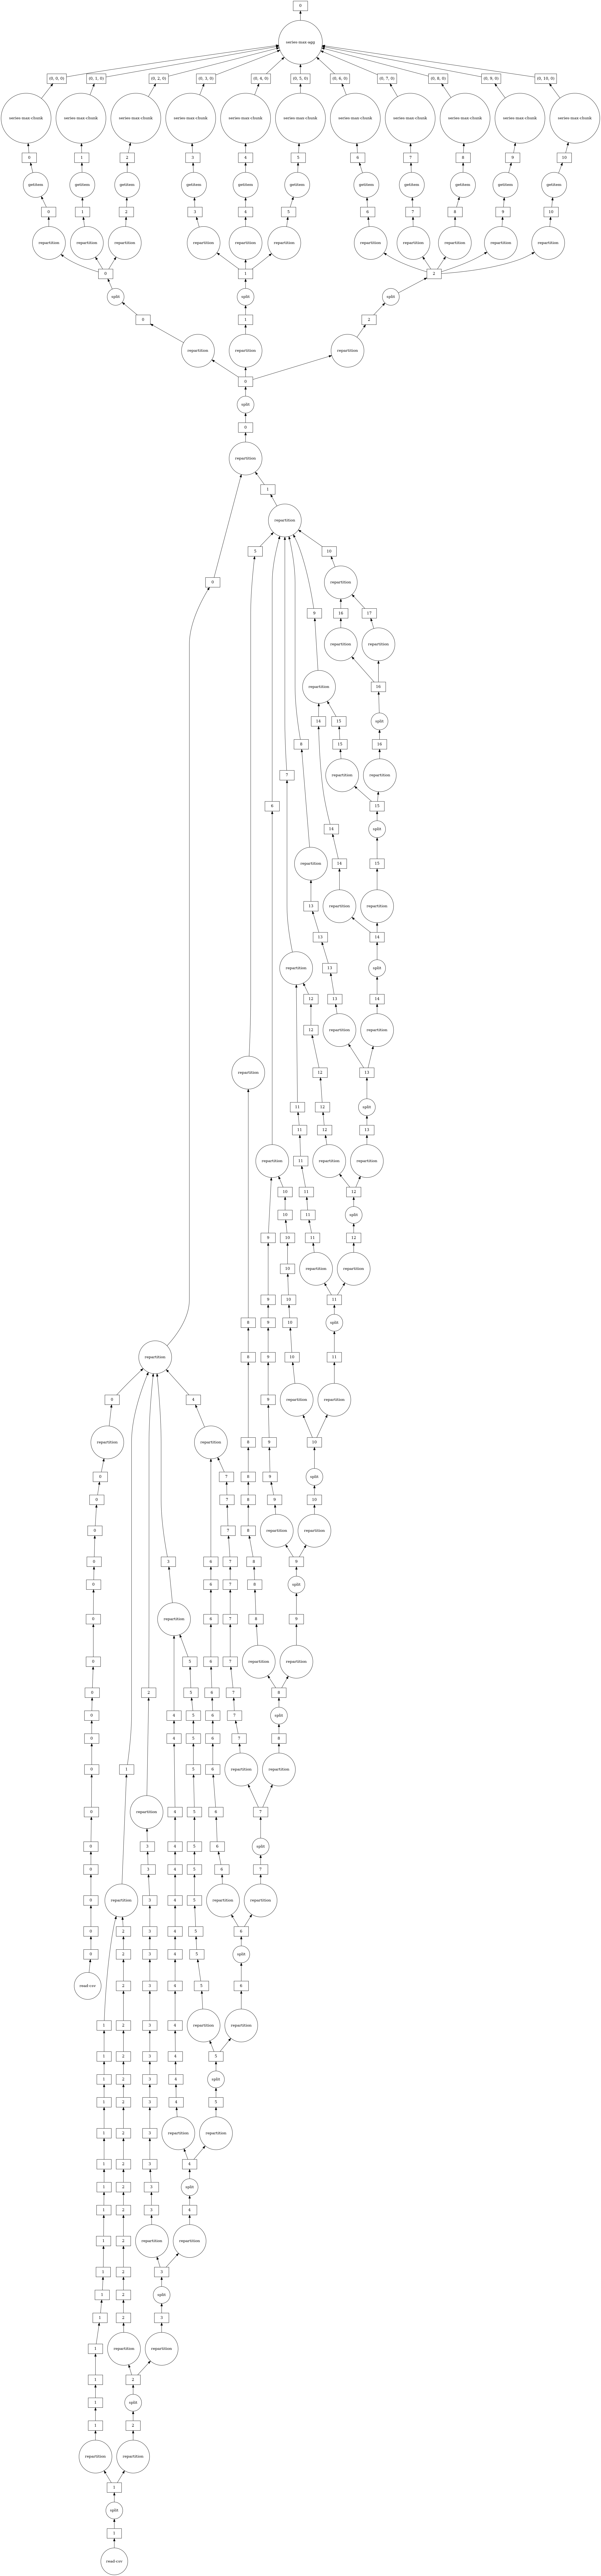

In [35]:
df.exam1.max().visualize()

### Exercise 2:
Try to compute the mean score for the exam5 of all students.

The plot the chart of the scores of the exams5 of all students named ```Lucia Damico```

In [37]:
%matplotlib inline

In [36]:
#put your code here for the mean, result should be 23.496144
df.exam5.mean().compute()

23.496144

In [46]:
df_lucia_damico = df[df['name'] == 'Lucia Damico']
df_lucia_damico = df_lucia_damico.reset_index()


df_lucia_damico_exam.plot()

AttributeError: 'DataFrame' object has no attribute 'plot'

### Exercise 3:

Try to calculate the mean of the ```exam_score_mean``` for all the students enrolled on each university

In [40]:
df

,id,name,address,age,college,degree_course,exam_score_mean,exam1,exam2,exam3,exam4,exam5,exam6,exam7,exam8,exam9,exam10
npartitions=11,,,,,,,,,,,,,,,,,
,object,object,object,int64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [41]:
df.groupby('college').exam_score_mean.mean().compute()

#output should be something like:
#University of Milano    24.150582
#University of Padova    24.153167
#University of Trento    24.150894
#University of Verona    24.148663

college
University of Milano    24.150582
University of Padova    24.153167
University of Trento    24.150894
University of Verona    24.148663
Name: exam_score_mean, dtype: float64

### Exercise 4:
Try to calculate the mean of the exam10 for all the students enrolled at ```University of Padova``` 

In [42]:
df[df.college == 'University of Padova'].exam10.mean().compute()

23.49068955368719